## Authors
- Hazem Aboulfotouh
- Angel Mola 
- Eduardo Baldo
- Alba Perna 
- Zackary Belkacem

# FDS Final Project: Implementation of Binary Classifier for flight delay prediciton

## Abstract

<div style="text-align: justify;">

In this project, a binary classifier is implemented to detect flight delays within the airline industry. Leveraging a dataset sourced from Kaggle, encompassing information on various airlines in the United States, our study employed diverse machine learning models such as Logistic Regression, XGBoost, Neural Network, KNN, and Random Forests for training and evaluation. Despite the exhaustive exploration of these models, an overall accuracy ceiling of 67% was reached, revealing a significant limitation. The primary bottleneck emerged from the absence of crucial weather-related information pertaining to the flights within the dataset.

</div>


## Introduction

<div style="text-align: justify;">

In the airline industry, the timely departure and arrival of flights stand as integral components crucial for operational efficiency and passenger contentment. nevertheless over 40% of commercial flights face delays, a phenomenon with substantial consequences for both travelers and industry operators. That's why we're diving into a big study to figure out what's causing these delays and what factors are messing with flight schedules. This project is meticulously crafted to provide an exhaustive examination of the factors affecting air flight delays. Employing a multidisciplinary approach, we want to untangle how these different factors interact, showing us why it's so tough to keep flights on time in the world of commercial aviation. Furthermore, our ambition extends beyond mere problem identification; we aspire to construct predictive models capable of anticipating potential delays. The deployment of such models holds promise in furnishing passengers with invaluable insights, empowering them with essential information for strategic travel planning.
</div>








## Dataset

### Airlines Dataset Overview

The airlines dataset consists of 539,383 instances and includes 8 different features. The primary task is to predict whether a given flight will be delayed based on information related to scheduled departure. The dataset is well-prepared with no duplicates, missing values, or nulls. the dataset can be found through this [Link](https://www.kaggle.com/datasets/jimschacko/airlines-dataset-to-predict-a-delay).

### Dataset Details

- **Size:** 539,383 instances
- **Features:** 8 columns

### Prediction Task

The goal is to predict flight delays using scheduled departure information.

### Dataset Columns

1. `id`: Identifier for each instance.
2. `Airline`: Airline associated with the flight.
3. `aircraft_type`: Type of aircraft used for the flight.
4. `AirportFrom`: Departure airport.
5. `AirportTo`: Destination airport.
6. `DayOfWeek`: Day of the week for scheduled departure.
7. `departure_time`: Scheduled departure time.
8. `duration`: Duration of the flight.
9. `Delay`: Target variable indicating whether the flight was delayed.

### Data Quality

The dataset has been curated with attention to quality:
- No duplicates
- No missing values
- No nulls


## Methodology

- Conducted Exploratory Data Analysis (EDA) to gain insights through plots and statistics.
- Checked for nulls, duplicates, and missing values, finding none.

### Data Preprocessing

- Dropped columns 'ID' and 'aircraft_type' due to their lack of importance for training.
- Encoded categorical variables using ordinal encoding (indexing unique values) and one-hot encoding.
- Addressed outliers in numerical features by removing values exceeding the mean by one standard deviation.
- Checked for correlation between features in order to reduce the dimensionality but the features were not correlated.

### Dataset Splitting

- Split the dataset into 75% for training and 25% for testing.
- Trained the models on both version of the data(ordinal-encoded & one-hot encoded)

### Models Trained

- Utilized various models for training:
  - Logistic Regression
  - XGBoost
  - K-Nearest Neighbors (KNN)
  - Neural Network
  - Decision Tree
  - Random Forest

### Evaluation Metric

- Evaluated model performance using the Accuracy metric.


## Results

| Model              | Accuracy on One-Hot Encoded Data | Accuracy on Ordinal Encoded Data |
| ------------------ | -------------------------------- | --------------------------------- |
| Logistic Regression| 64.35%                           | 59.74%                            |
| XGBoost            | 66.25%                           | 66.71%                            |
| Decision Trees     | 65.51%                           | 64.89%                            |
| Random Forests     | 66.04%                           | 62.12%                            |
| Neural Network     | 62.53%                           | 57.32%                            |
| KNN                | 64.78%                           | 65.05%                            |


## Conclusion 

### Challenges in Delay Prediction:

1. **Limited Distinctions Observed Between Models:**
   - Despite using various models, there are limited noticeable differences in their performance.

2. **Tuning Parameters Does Not Yield Substantial Changes:**
   - Adjusting model parameters does not result in significant improvements in prediction accuracy.

3. **Data Lacks Explanatory Power:**
   - The dataset lacks certain critical information that could enhance predictive capabilities.

4. **Missing Weather Data:**
   - The absence of weather data is a notable gap since weather conditions can have a significant impact on flight delays.

5. **Absence of External Factors:**
   - External factors such as strikes, festivities dates, and other events are not considered in the dataset, which could influence flight delays.
   
6. **Challenges with Encoding Techniques:**
   - The One-Hot Encoded Data faced the problem of the curse of dimensionality due to categorical features having many unique values.
   - The Ordinal Encoded Data may introduce potential issues by assigning importance to values based on their order, potentially conveying false information.


## Future Work 

1. **Incorporate Additional Data:** Integrate weather information as it plays a crucial role in flight delays and include details about the delay history of previous flights, aiding in pattern recognition.

2. **Create Relevant Features:** Develop new features that might capture patterns related to delays, considering external factors like strikes, festivities, or special events.

3. **Comprehensive Tuning:** Conduct an in-depth exploration of hyperparameter tuning to extract optimal performance from selected models.

4. **Feature Selection/Extraction:** Implement techniques to reduce dimensionality, especially for categorical features, to address the curse of dimensionality.

5. **Time Series Analysis:** If applicable, consider treating flight delay prediction as a time series problem, incorporating temporal aspects for better forecasting.

6. **Dynamic Model Updates:** Establish a framework for continuous monitoring of the model's performance and update the model as new data becomes available.



## References

## Code

### Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier

### Exploratory Data Analysis 

In [2]:
# read the data
df = pd.read_csv('Airlines.csv')

In [3]:
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [4]:
df.columns

Index(['id', 'Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek',
       'Time', 'Length', 'Delay'],
      dtype='object')

In [5]:
# renaming the columns for better understanding
df.rename(columns={'Flight':'aircraft_type', 'Length':'duration', 'Time':'departure_time'}, inplace=True)
df.columns

Index(['id', 'Airline', 'aircraft_type', 'AirportFrom', 'AirportTo',
       'DayOfWeek', 'departure_time', 'duration', 'Delay'],
      dtype='object')

In [6]:
df.head()

,id,Airline,aircraft_type,AirportFrom,AirportTo,DayOfWeek,departure_time,duration,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,539383.0,269692.000000,155706.604461,1.0,134846.5,269692.0,404537.5,539383.0
aircraft_type,539383.0,2427.928630,2067.429837,1.0,712.0,1809.0,3745.0,7814.0
DayOfWeek,539383.0,3.929668,1.914664,1.0,2.0,4.0,5.0,7.0
departure_time,539383.0,802.728963,278.045911,10.0,565.0,795.0,1035.0,1439.0
duration,539383.0,132.202007,70.117016,0.0,81.0,115.0,162.0,655.0
Delay,539383.0,0.445442,0.497015,0.0,0.0,0.0,1.0,1.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              539383 non-null  int64 
 1   Airline         539383 non-null  object
 2   aircraft_type   539383 non-null  int64 
 3   AirportFrom     539383 non-null  object
 4   AirportTo       539383 non-null  object
 5   DayOfWeek       539383 non-null  int64 
 6   departure_time  539383 non-null  int64 
 7   duration        539383 non-null  int64 
 8   Delay           539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


In [9]:
#checking for null values
print(df.isnull().sum())

#checking for duplicate values
print(df.duplicated().sum())

id                0
Airline           0
aircraft_type     0
AirportFrom       0
AirportTo         0
DayOfWeek         0
departure_time    0
duration          0
Delay             0
dtype: int64
0


**Comment:** No nulls and duplicates were found.

#### Converting the columns departure_time and duration to hours instead of minutes

In [10]:
# the departure time is represented as the minutes after midnight so it will be converted to hours for better readbility and understanding
df['departure_time'] = df['departure_time'].apply(lambda x: x/60)
# Converting the duration to hours for better readbility and understanding
df['duration'] = df['duration'].apply(lambda x: x/60)

df.head()

,id,Airline,aircraft_type,AirportFrom,AirportTo,DayOfWeek,departure_time,duration,Delay
0,1,CO,269,SFO,IAH,3,0.250000,3.416667,1
1,2,US,1558,PHX,CLT,3,0.250000,3.700000,1
2,3,AA,2400,LAX,DFW,3,0.333333,2.750000,1
3,4,AA,2466,SFO,DFW,3,0.333333,3.250000,1
4,5,AS,108,ANC,SEA,3,0.500000,3.366667,0


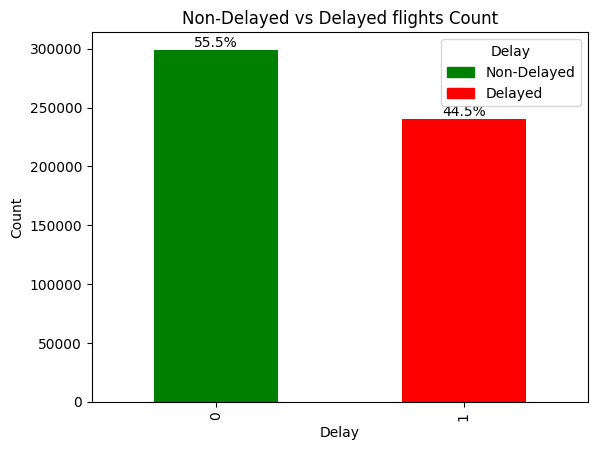

In [11]:
delays_count = df['Delay'].value_counts()

# Plot the bar chart
ax = delays_count.plot(kind='bar', color=['green', 'red'])  # green for non-delayed, red for delayed

# Add labels and title
plt.xlabel('Delay')
plt.ylabel('Count')
plt.title('Non-Delayed vs Delayed flights Count')

# Display percentages on top of each bar
total = len(df['Delay'])
for i, count in enumerate(delays_count):
    percentage = count / total * 100
    plt.text(i, count + 0.1, f'{percentage:.1f}%', ha='center', va='bottom')

# Create custom legend handles
legend_handles = [
    Patch(color='green', label='Non-Delayed'),
    Patch(color='red', label='Delayed'),
]

# Add legend
ax.legend(handles=legend_handles, title='Delay', loc='best')

# Show the plot
plt.show()

#### Comment

The chart illustrates that the dataset is evenly balanced between non-delayed and delayed flights, with percentages of 55.5% and 44.5%, respectively.


In [12]:
#finding the delayed flights for more insights
df_delayed = df[df['Delay'] == 1]
df_delayed.head()

,id,Airline,aircraft_type,AirportFrom,AirportTo,DayOfWeek,departure_time,duration,Delay
0,1,CO,269,SFO,IAH,3,0.250000,3.416667,1
1,2,US,1558,PHX,CLT,3,0.250000,3.700000,1
2,3,AA,2400,LAX,DFW,3,0.333333,2.750000,1
3,4,AA,2466,SFO,DFW,3,0.333333,3.250000,1
5,6,CO,1094,LAX,IAH,3,0.500000,3.016667,1


<Axes: xlabel='Delay', ylabel='count'>

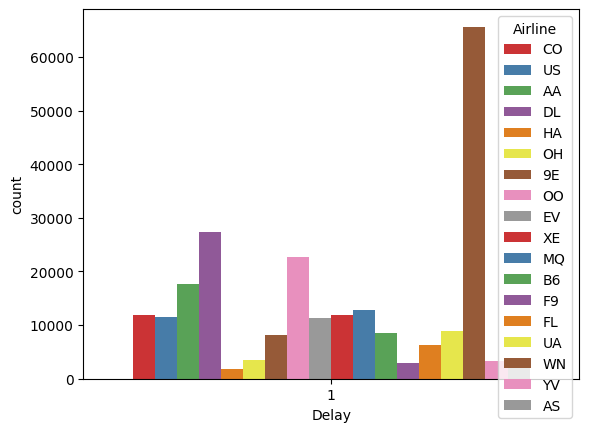

In [13]:
# delay count for each airline
sns.countplot(x='Delay', hue = 'Airline'  ,data=df_delayed, palette='Set1')


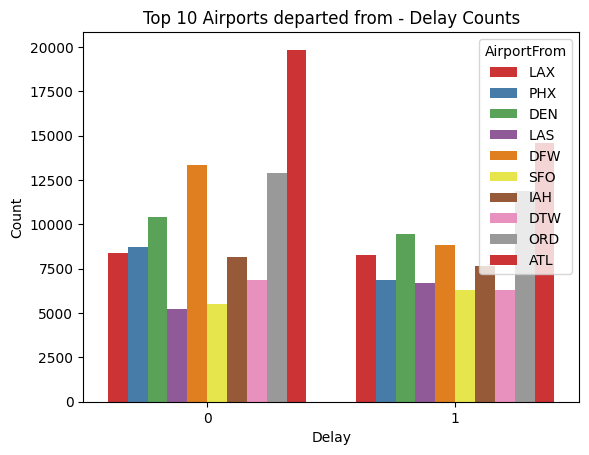

In [14]:
# Get the top 10 values in 'AirportFrom'
top_airports = df['AirportFrom'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 values
df_top_airports = df[df['AirportFrom'].isin(top_airports)]

# Plot the countplot
sns.countplot(x='Delay', hue='AirportFrom', data=df_top_airports, palette='Set1')

# Add labels and title
plt.xlabel('Delay')
plt.ylabel('Count')
plt.title('Top 10 Airports departed from - Delay Counts')

# Show the plot
plt.show()

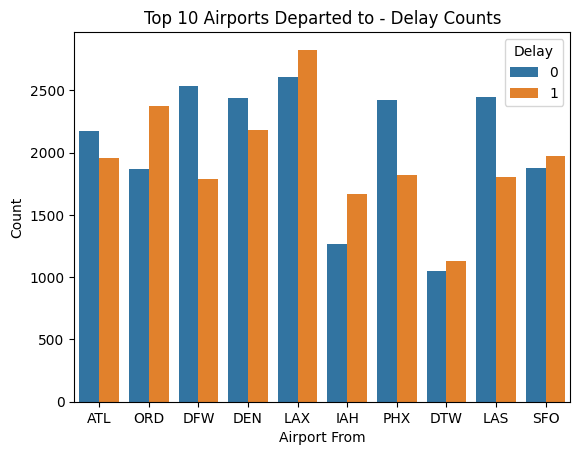

In [15]:
# Get the top 10 values in 'AirportFrom'
top_airports = df['AirportTo'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 values
df_top_airports = df[df['AirportTo'].isin(top_airports)]

# Plot the countplot with explicit order
sns.countplot(x='AirportFrom', hue='Delay', data=df_top_airports, order=top_airports)

# Add labels and title
plt.xlabel('Airport From')
plt.ylabel('Count')
plt.title('Top 10 Airports Departed to - Delay Counts')

# Show the plot
plt.show()

<Axes: xlabel='Delay', ylabel='count'>

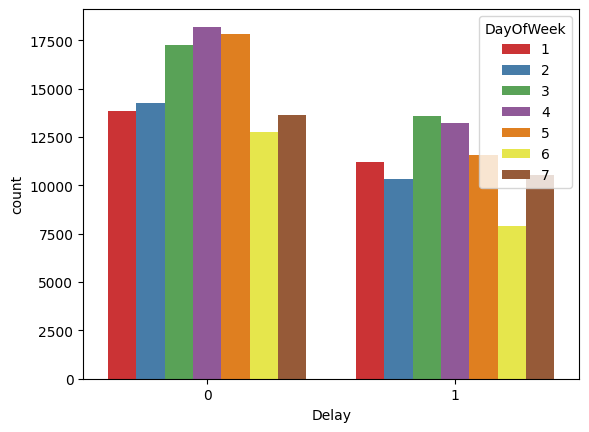

In [16]:
# Plot the countplot for the the delays depending on the weekday
sns.countplot(x='Delay', hue='DayOfWeek', data=df_top_airports, palette='Set1')

### Encoding the columns ['AirportFrom', 'AirportTo', 'Airline'] using ordinal encoding

In [17]:
airport_list = df['AirportFrom'].unique().tolist()
airport_list.extend(df['AirportTo'].unique().tolist())
# removing the duplicate values
airport_list = set(airport_list)
# making a dct of the airport list and assigning a unique index to each airport
airport_dict = {value: index for index, value in enumerate(airport_list)}

airlines_list = df['Airline'].unique().tolist()
# making a dct of the airlines list and assigning a unique index to each airline
airlines_dict = {value: index for index, value in enumerate(airlines_list)}

df_ordinal_encoded = df.copy()

# Mapping the airport and airline dct to the dataframe
df_ordinal_encoded['AirportFrom'] = df['AirportFrom'].map(airport_dict)
df_ordinal_encoded['AirportTo'] = df['AirportTo'].map(airport_dict)
df_ordinal_encoded['Airline'] = df['Airline'].map(airlines_dict)

df_ordinal_encoded.head()


,id,Airline,aircraft_type,AirportFrom,AirportTo,DayOfWeek,departure_time,duration,Delay
0,1,0,269,73,1,3,0.250000,3.416667,1
1,2,1,1558,204,114,3,0.250000,3.700000,1
2,3,2,2400,196,103,3,0.333333,2.750000,1
3,4,2,2466,73,103,3,0.333333,3.250000,1
4,5,3,108,118,116,3,0.500000,3.366667,0


In [18]:
airport_dict.keys()

dict_keys(['STL', 'IAH', 'CLE', 'BQN', 'TRI', 'HPN', 'ALB', 'MLI', 'OKC', 'RDM', 'CSG', 'GPT', 'IDA', 'BQK', 'YAK', 'ROA', 'SPI', 'MFE', 'DRO', 'PIA', 'JNU', 'PDX', 'BNA', 'PAH', 'MSO', 'CHO', 'GFK', 'MIA', 'MKG', 'ATL', 'MCO', 'FAY', 'ADQ', 'FWA', 'MFR', 'BZN', 'BMI', 'BIL', 'SGU', 'GSO', 'ABE', 'SNA', 'GNV', 'CWA', 'MLU', 'DAB', 'CMH', 'PBI', 'AVP', 'COD', 'BGR', 'MKE', 'BLI', 'BFL', 'SDF', 'HNL', 'AGS', 'MEM', 'PLN', 'DCA', 'BOI', 'PWM', 'TUL', 'FLL', 'EVV', 'RSW', 'RNO', 'SAN', 'SBN', 'ECP', 'LFT', 'LGA', 'RST', 'SFO', 'BTM', 'ELM', 'PSP', 'SCE', 'BET', 'FLO', 'ASE', 'IYK', 'ICT', 'GEG', 'BIS', 'DLH', 'CHS', 'TWF', 'EKO', 'LCH', 'MYR', 'DAL', 'SHV', 'CHA', 'IAD', 'AZO', 'PHF', 'MSP', 'TVC', 'TYS', 'ATW', 'CVG', 'TYR', 'DFW', 'BKG', 'TOL', 'GRR', 'CRW', 'BRO', 'YUM', 'SCC', 'ORD', 'RAP', 'CYS', 'CLT', 'EAU', 'SEA', 'MOD', 'ANC', 'BGM', 'EGE', 'ERI', 'MOB', 'JAN', 'JAC', 'MTJ', 'OTH', 'MDT', 'MBS', 'BUR', 'CRP', 'MLB', 'SAF', 'OAJ', 'SAV', 'AEX', 'PSG', 'PVD', 'STT', 'TEX', 'SYR', 'R

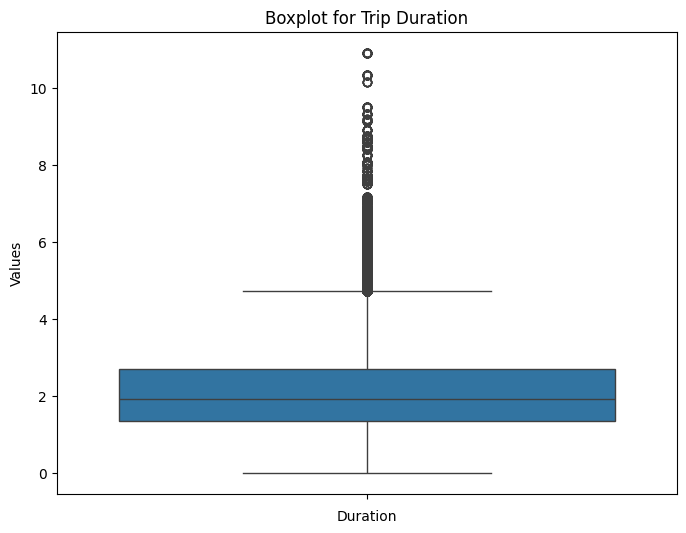

In [19]:
plt.figure(figsize=(8, 6))  
sns.boxplot(data=df_ordinal_encoded['duration'])

# Add labels and title
plt.xlabel('Duration')
plt.ylabel('Values')
plt.title('Boxplot for Trip Duration')

# Show the plot
plt.show()

In [20]:
# Calculate mean and standard deviation
mean_value = df_ordinal_encoded['duration'].mean()
std_value = df_ordinal_encoded['duration'].std()

# threshold for outliers (2 standard deviations)
threshold = 2

# Detect outliers
outliers = df_ordinal_encoded[(df_ordinal_encoded['duration'] < mean_value - threshold * std_value) | 
                              (df_ordinal_encoded['duration'] > mean_value + threshold * std_value)]

outliers.head()

,id,Airline,aircraft_type,AirportFrom,AirportTo,DayOfWeek,departure_time,duration,Delay
23,24,6,17,220,55,3,1.666667,6.333333,1
24,25,1,122,118,204,3,1.883333,5.450000,1
231,232,2,528,196,27,3,6.000000,4.666667,1
233,234,2,552,73,27,3,6.000000,5.250000,1
265,266,4,1084,118,97,3,6.000000,5.433333,0


In [21]:
print('There are',len(outliers),'instances of outliers in the dataset when the threshold is 3 standard deviations.')

There are 29851 instances of outliers in the dataset when the threshold is 3 standard deviations.


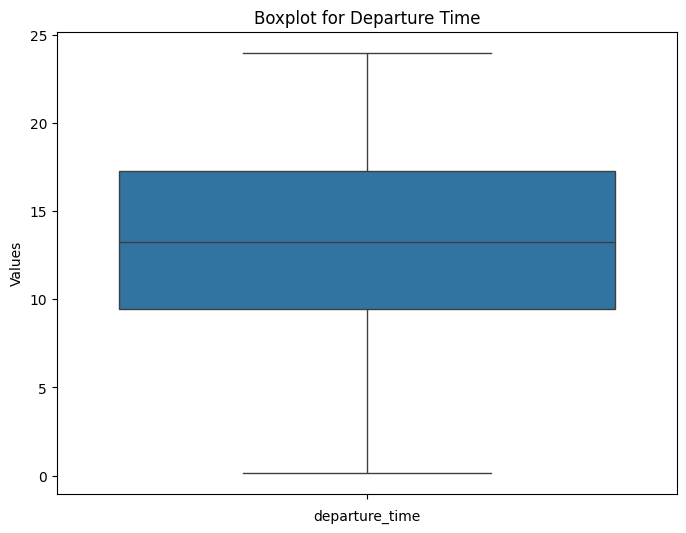

In [22]:
plt.figure(figsize=(8, 6))  
sns.boxplot(data=df_ordinal_encoded['departure_time'])

# Add labels and title
plt.xlabel('departure_time')
plt.ylabel('Values')
plt.title('Boxplot for Departure Time')

# Show the plot
plt.show()

In [23]:
# Dropping the column id as it is not required for the model
df_ordinal_encoded.drop('id', axis=1, inplace=True)

# Dropping outliers
df_ordinal_encoded.drop(outliers.index, inplace=True)

# Dropping the aircraft_type column as it is irrelevant for the model
df_ordinal_encoded.drop('aircraft_type', axis=1, inplace=True)

df_ordinal_encoded.head()

,Airline,AirportFrom,AirportTo,DayOfWeek,departure_time,duration,Delay
0,0,73,1,3,0.250000,3.416667,1
1,1,204,114,3,0.250000,3.700000,1
2,2,196,103,3,0.333333,2.750000,1
3,2,73,103,3,0.333333,3.250000,1
4,3,118,116,3,0.500000,3.366667,0


### Training the Classifiers

#### The Models to be trained are:
- Logistic Regression
- XGBoost
- Neural Network
- KNN
- Decision Trees
- Random Forests


#### Getting the data ready for training

In [24]:
# Splitting the data into X and y
X = df_ordinal_encoded.drop('Delay', axis=1).values
y = df_ordinal_encoded['Delay'].values

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#### Training logistic regression on the ordinal-encoded dataset

In [25]:
# training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.61      0.76      0.68     71050
           1       0.56      0.38      0.46     56333

    accuracy                           0.60    127383
   macro avg       0.59      0.57      0.57    127383
weighted avg       0.59      0.60      0.58    127383



In [26]:
accuracy = accuracy_score(y_test, pred)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 59.63


##### Applying Grid Search to find the Best Parameters

In [27]:
# Defining the grid search parameters
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'solver': ['liblinear', 'lbfgs']}

# Defining the grid search with a scoring metric (F1-score)
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='f1')

# Fitting the grid search to the training data
grid_search.fit(X_train, y_train)

# Output the best parameters
print("Best parameters: ", grid_search.best_params_)



Best parameters:  {'C': 1, 'solver': 'lbfgs'}


In [28]:
# Refit the model with the best parameters on the entire training set
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
print(classification_report(y_test, best_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.61      0.76      0.68     71050
           1       0.56      0.38      0.46     56333

    accuracy                           0.60    127383
   macro avg       0.59      0.57      0.57    127383
weighted avg       0.59      0.60      0.58    127383



In [29]:
accuracy = accuracy_score(y_test, pred)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 59.63


#### Trying a different approach by encoding the categorical values using one-hot encoding

In [30]:
# copying the dataframe for one hot encoding
df_onehot_encoded = df.copy()
df_onehot_encoded.head()

,id,Airline,aircraft_type,AirportFrom,AirportTo,DayOfWeek,departure_time,duration,Delay
0,1,CO,269,SFO,IAH,3,0.250000,3.416667,1
1,2,US,1558,PHX,CLT,3,0.250000,3.700000,1
2,3,AA,2400,LAX,DFW,3,0.333333,2.750000,1
3,4,AA,2466,SFO,DFW,3,0.333333,3.250000,1
4,5,AS,108,ANC,SEA,3,0.500000,3.366667,0


In [31]:
# dropping the ID and the aircraft_type columns
df_onehot_encoded.drop(['id', 'aircraft_type'], axis=1, inplace=True)
df_onehot_encoded.head()

,Airline,AirportFrom,AirportTo,DayOfWeek,departure_time,duration,Delay
0,CO,SFO,IAH,3,0.250000,3.416667,1
1,US,PHX,CLT,3,0.250000,3.700000,1
2,AA,LAX,DFW,3,0.333333,2.750000,1
3,AA,SFO,DFW,3,0.333333,3.250000,1
4,AS,ANC,SEA,3,0.500000,3.366667,0


In [32]:
#  each row in the datafarme will have a 1 in the column corresponding to the airport it is departing from and a 1 in the column corresponding to the airport it is arriving to
encoding_frame = pd.DataFrame(index=df_onehot_encoded.index, columns = airport_dict.keys())
encoding_frame.fillna(0, inplace=True)
encoding_frame.head()

,STL,IAH,CLE,BQN,TRI,HPN,ALB,MLI,OKC,RDM,...,HOU,TUS,MCI,BOS,PIT,LWB,HDN,OME,SJU,MHK
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
 # Iterating over the rows of the dataframe
for index, row in df_onehot_encoded.iterrows():
    # if the airport is present in the columns of the encoding frame, then the value of that column will be set to 1
    if row['AirportFrom'] in encoding_frame.columns:
        encoding_frame.loc[index, row['AirportFrom']] = 1
    # if the airport is present in the columns of the encoding frame, then the value of that column will be set to 1
    if row['AirportTo'] in encoding_frame.columns:
        encoding_frame.loc[index, row['AirportTo']] = 1

In [34]:
encoding_frame.head()

,STL,IAH,CLE,BQN,TRI,HPN,ALB,MLI,OKC,RDM,...,HOU,TUS,MCI,BOS,PIT,LWB,HDN,OME,SJU,MHK
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
#  each row in the datafarme will have a 1 in the column corresponding to the airline it is departing from
encoding_frame_airlines = pd.DataFrame(index=df_onehot_encoded.index, columns = airlines_dict.keys())
encoding_frame_airlines.fillna(0, inplace=True)

In [36]:
# Iterating over the rows of the dataframe
for index, row in df_onehot_encoded.iterrows():
    # if the airport is present in the columns of the encoding frame, then the value of that column will be set to 1
    if row['Airline'] in encoding_frame_airlines.columns:
        encoding_frame_airlines.loc[index, row['Airline']] = 1

encoding_frame_airlines.head()


,CO,US,AA,AS,DL,B6,HA,OO,9E,OH,EV,XE,YV,UA,MQ,FL,F9,WN
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
# each row in the datafarme will have a 1 in the column corresponding to the day of the week it is departing from
columns_ = sorted(df_onehot_encoded['DayOfWeek'].unique())
encoding_frame_day = pd.DataFrame(index=df_onehot_encoded.index, columns =columns_ )
encoding_frame_day.fillna(0, inplace=True)

In [38]:
# Iterating over the rows of the dataframe
for index, row in df_onehot_encoded.iterrows():
    # if the airport is present in the columns of the encoding frame, then the value of that column will be set to 1
    if row['DayOfWeek'] in encoding_frame_day.columns:
        encoding_frame_day.loc[index, row['DayOfWeek']] = 1


In [39]:
# dropping the columns that are encoded
df_onehot_encoded.drop(['AirportFrom', 'AirportTo', 'Airline', 'DayOfWeek'], axis=1, inplace=True)
# concatenating the encoded columns to the dataframe
df_onehot_encoded = pd.concat([df_onehot_encoded, encoding_frame, encoding_frame_airlines, encoding_frame_day], axis=1)

In [40]:
df_onehot_encoded.head()

,departure_time,duration,Delay,STL,IAH,CLE,BQN,TRI,HPN,ALB,...,FL,F9,WN,1,2,3,4,5,6,7
0,0.250000,3.416667,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.250000,3.700000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.333333,2.750000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.333333,3.250000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.500000,3.366667,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


##### training the model on the one-hot encoded dataset

In [41]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Select the columns to br scaled
columns_to_scale = ['departure_time', 'duration']

# Fit and transform the selected columns
df_onehot_encoded[columns_to_scale] = scaler.fit_transform(df_onehot_encoded[columns_to_scale])

# Splitting the data into X and y
X = df_onehot_encoded.drop('Delay', axis=1).values
y = df_onehot_encoded['Delay'].values

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)
df_onehot_encoded.head()


,departure_time,duration,Delay,STL,IAH,CLE,BQN,TRI,HPN,ALB,...,FL,F9,WN,1,2,3,4,5,6,7
0,-2.833092,1.038237,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,-2.833092,1.280689,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,-2.815110,0.467761,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,-2.815110,0.895618,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,-2.779144,0.995451,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [42]:
# training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
accuracy = accuracy_score(y_test, pred)

C:\Users\hazem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.65      0.78      0.71     74817
           1       0.63      0.48      0.54     60029

    accuracy                           0.64    134846
   macro avg       0.64      0.63      0.63    134846
weighted avg       0.64      0.64      0.63    134846



In [43]:
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 64.35


##### Applying grid search to find the best parameters

In [44]:
# Defining the grid search parameters
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'solver': ['liblinear', 'lbfgs']}

# Defining the grid search with a scoring metric (F1-score)
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='f1')

# Fitting the grid search to the training data
grid_search.fit(X_train, y_train)

# Output the best parameters
print("Best parameters: ", grid_search.best_params_)

C:\Users\hazem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hazem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

Best parameters:  {'C': 10, 'solver': 'lbfgs'}


C:\Users\hazem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
# Refit the model with the best parameters on the entire training set
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
print(classification_report(y_test, best_model.predict(X_test)))
accuracy = accuracy_score(y_test, pred)

C:\Users\hazem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.65      0.78      0.71     74817
           1       0.63      0.48      0.54     60029

    accuracy                           0.64    134846
   macro avg       0.64      0.63      0.63    134846
weighted avg       0.64      0.64      0.63    134846



In [46]:
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 64.35


##### **Comment:** The accuracy was improved by 4% after using one-hot encoding instead of ordinal encoding

#### Training the model with the numerical Features only

In [47]:
df_onehot_encoded.head()

,departure_time,duration,Delay,STL,IAH,CLE,BQN,TRI,HPN,ALB,...,FL,F9,WN,1,2,3,4,5,6,7
0,-2.833092,1.038237,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,-2.833092,1.280689,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,-2.815110,0.467761,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,-2.815110,0.895618,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,-2.779144,0.995451,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [48]:
df_numerical = df_onehot_encoded[['departure_time', 'duration', 'Delay']]
df_numerical.head()

,departure_time,duration,Delay
0,-2.833092,1.038237,1
1,-2.833092,1.280689,1
2,-2.815110,0.467761,1
3,-2.815110,0.895618,1
4,-2.779144,0.995451,0


In [49]:
# Splitting the data into X and y
X = df_numerical.drop('Delay', axis=1).values
y = df_numerical['Delay'].values

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [50]:
# training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
accuracy = accuracy_score(y_test, pred)

              precision    recall  f1-score   support

           0       0.58      0.76      0.66     74817
           1       0.52      0.32      0.39     60029

    accuracy                           0.57    134846
   macro avg       0.55      0.54      0.53    134846
weighted avg       0.55      0.57      0.54    134846



In [51]:
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 56.50


#### **Comment** The approach that achieved the best accuracy is one-hot encoding.

#### Training using XGBoost

##### XGBoost using the ordinal-encoded dataset

In [52]:
# Splitting the data into X and y
X = df_ordinal_encoded.drop('Delay', axis=1).values
y = df_ordinal_encoded['Delay'].values

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)  
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73     71050
           1       0.67      0.49      0.57     56333

    accuracy                           0.67    127383
   macro avg       0.67      0.65      0.65    127383
weighted avg       0.67      0.67      0.66    127383



In [54]:
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 66.70


##### XGBoost using the one-hot encoded dataset

In [55]:
# Splitting the data into X and y
X = df_onehot_encoded.drop('Delay', axis=1).values
y = df_onehot_encoded['Delay'].values

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)
df_onehot_encoded.head()

,departure_time,duration,Delay,STL,IAH,CLE,BQN,TRI,HPN,ALB,...,FL,F9,WN,1,2,3,4,5,6,7
0,-2.833092,1.038237,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,-2.833092,1.280689,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,-2.815110,0.467761,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,-2.815110,0.895618,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,-2.779144,0.995451,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [56]:
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)  
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.66      0.80      0.73     74817
           1       0.67      0.49      0.56     60029

    accuracy                           0.66    134846
   macro avg       0.66      0.65      0.64    134846
weighted avg       0.66      0.66      0.65    134846



In [57]:
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 66.25


##### XGBoost using numerical features only

In [58]:
# Splitting the data into X and y
X = df_numerical.drop('Delay', axis=1).values
y = df_numerical['Delay'].values

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [59]:
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)  
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.63      0.74      0.68     74817
           1       0.58      0.45      0.51     60029

    accuracy                           0.61    134846
   macro avg       0.60      0.59      0.59    134846
weighted avg       0.61      0.61      0.60    134846



In [60]:
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 61.08
